In [125]:
import pandas as pd
import json
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from statsmodels.graphics.gofplots import qqplot
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score

In [126]:
df=pd.read_csv('train.csv')
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [127]:
df.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [129]:

df.drop(columns=['imdb_id','poster_path', 'original_title', 'overview', 'tagline','spoken_languages','homepage','original_language','belongs_to_collection', 'production_companies', 'production_countries','status','title','Keywords','cast','crew'],inplace=True)

In [130]:
#df['original_language'] = (df['original_language']== 'en').astype(int)
#df['homepage'] = df['homepage'].fillna(value=0)
# 1 if homepage, 0 if no homepage
#df['homepage'] = (df['homepage']!= 0).astype(int)
# 1 if english, 0 if not english
df['runtime'] = df['runtime'].fillna(value=0)
df['movie_age'] = 2019-pd.to_datetime(df['release_date']).dt.year
#df[['genres','genres1','genres2','genres3','genres4','genres5','genres6','genres7']] = df['genres'].str.split(',', expand=True)

In [131]:
df.head(10)

,id,budget,genres,popularity,release_date,runtime,revenue,movie_age
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",6.575393,2/20/15,93.0,12314651,4
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",8.248895,8/6/04,113.0,95149435,15
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",64.299990,10/10/14,105.0,13092000,5
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",3.174936,3/9/12,122.0,16000000,7
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.148070,2/5/09,118.0,3923970,10
5,6,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",0.743274,8/6/87,83.0,3261638,32
6,7,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",7.286477,8/30/12,92.0,85446075,7
7,8,0,"[{'id': 99, 'name': 'Documentary'}]",1.949044,1/15/04,84.0,2586511,15
8,9,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",6.902423,2/16/96,100.0,34327391,23
9,10,6000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",4.672036,4/16/03,91.0,18750246,16


In [132]:
df.describe()

,id,budget,popularity,runtime,revenue,movie_age
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3.000000e+03,3000.000000
mean,1500.500000,2.253133e+07,8.463274,107.784667,6.672585e+07,14.420333
std,866.169729,3.702609e+07,12.104000,22.253944,1.375323e+08,15.480790
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00,-49.000000
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06,7.000000
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07,13.000000
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07,24.000000
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,50.000000


In [133]:
df.corr()

,id,budget,popularity,runtime,revenue,movie_age
id,1.000000,0.019732,-0.007470,0.009473,0.000610,0.011725
budget,0.019732,1.000000,0.342356,0.238182,0.752965,-0.046047
popularity,-0.007470,0.342356,1.000000,0.134839,0.461460,-0.059965
runtime,0.009473,0.238182,0.134839,1.000000,0.216230,-0.097760
revenue,0.000610,0.752965,0.461460,0.216230,1.000000,-0.020593
movie_age,0.011725,-0.046047,-0.059965,-0.097760,-0.020593,1.000000


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
id              3000 non-null int64
budget          3000 non-null int64
genres          2993 non-null object
popularity      3000 non-null float64
release_date    3000 non-null object
runtime         3000 non-null float64
revenue         3000 non-null int64
movie_age       3000 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 187.6+ KB


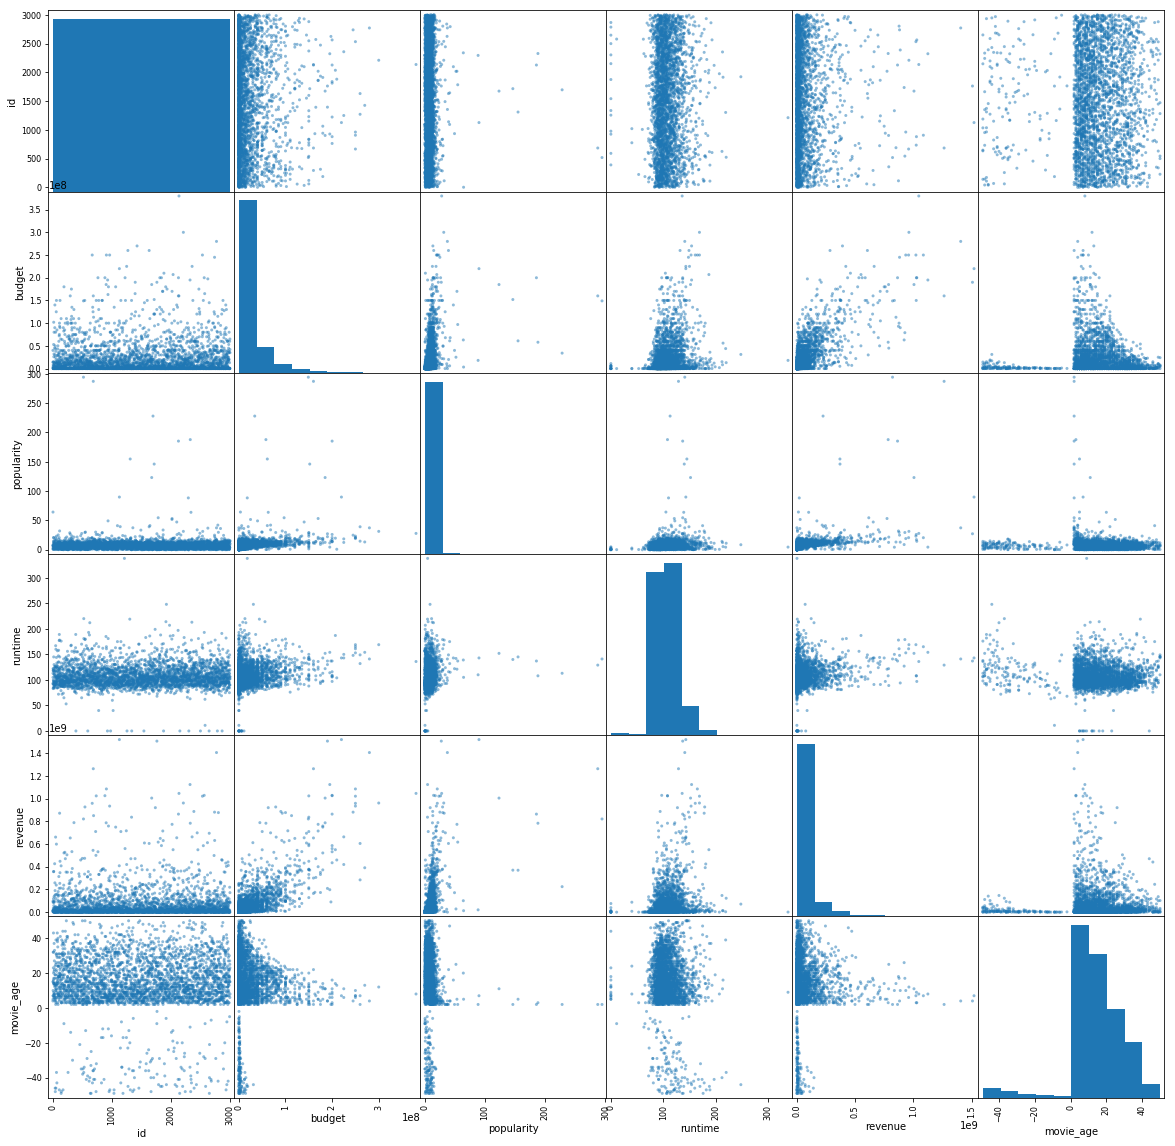

In [135]:
scatter_matrix(df, figsize =(20,20));

In [136]:
df = sm.add_constant(df)
df.head()

,const,id,budget,genres,popularity,release_date,runtime,revenue,movie_age
0,1.0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",6.575393,2/20/15,93.0,12314651,4
1,1.0,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",8.248895,8/6/04,113.0,95149435,15
2,1.0,3,3300000,"[{'id': 18, 'name': 'Drama'}]",64.299990,10/10/14,105.0,13092000,5
3,1.0,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",3.174936,3/9/12,122.0,16000000,7
4,1.0,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.148070,2/5/09,118.0,3923970,10


In [137]:
y = df.revenue

In [138]:
X= df[['id','budget', 'popularity', 'runtime','movie_age']]

In [139]:
X.head()

,id,budget,popularity,runtime,movie_age
0,1,14000000,6.575393,93.0,4
1,2,40000000,8.248895,113.0,15
2,3,3300000,64.299990,105.0,5
3,4,1200000,3.174936,122.0,7
4,5,0,1.148070,118.0,10


In [140]:
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.30)

In [141]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2100, 5), (900, 5), (2100,), (900,))

In [142]:
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       5.610
Model:                            OLS   Adj. R-squared:                  5.621
Method:                 Least Squares   F-statistic:                    -509.9
Date:                Thu, 25 Apr 2019   Prob (F-statistic):               1.00
Time:                        13:27:06   Log-Likelihood:                -41306.
No. Observations:                2100   AIC:                         8.262e+04
Df Residuals:                    2095   BIC:                         8.265e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
id         -4374.5936   2034.480     -2.150      0.032   -8364.406    -384.781
budget         2.5161      0.052     48.610      0.000       2.415       2.618
popularity  2.521e+06   1.59e+05     15.900      0.000    2.21e+06    2.83e+06
runtime    -5.009e+04   3.68e+04     -1.362      0.173   -1.22e+05     2.2e+04
movie_age   8.653e+04   1.14e+05      0.756      0.450   -1.38e+05    3.11e+05
==============================================================================
Omnibus:                     1444.739   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47651.919
Skew:                           2.785   Prob(JB):                         0.00
Kurtosis:                      25.662   Cond. No.                     3.92e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_val = scalar.transform(X_val)

C:\Users\en7qltl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\en7qltl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\en7qltl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# Linear Regression

In [144]:
regression = LinearRegression().fit(X_train,y_train)

In [145]:
mean_squared_error(y_val, regression.predict(X_val))
#153 million

7764575699061187.0

# Random Forest

In [146]:
rf = RandomForestRegressor(n_estimators=100,
                            n_jobs=-1,
                            random_state=1)

In [147]:
def score(model, X,y): 
     r2 = np.mean(cross_val_score(model,X,y,scoring = 'r2', cv = 5))
     mse = -np.mean(cross_val_score(model,X,y,scoring = 'neg_mean_squared_error', cv = 5))
     return(r2,mse)
print('R2 and mse on random forest', score(rf, X_train, y_train))

R2 and mse on random forest (0.6312752189772063, 6930528603073719.0)


# NN

In [151]:
model = Sequential()
model.add(Dense(units=6, activation = 'relu', input_shape=(5,), name = 'L1'))
model.add(Dense(units=4, activation = 'relu',  name = 'L2'))
model.add(Dense(units=1, activation = 'linear', name = 'output'))

In [152]:
opt = optimizers.SGD()
model.compile(loss = 'mse', optimizer = opt, metrics=['mse'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 6)                 36        
_________________________________________________________________
L2 (Dense)                   (None, 4)                 28        
_________________________________________________________________
output (Dense)               (None, 1)                 5         
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


In [153]:
history = model.fit(X_train, y_train, epochs=100, batch_size=25, verbose=0, validation_split=0.3, shuffle=True)

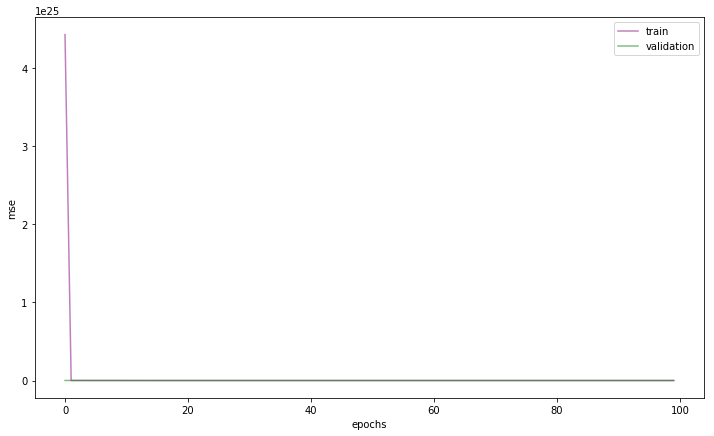

In [154]:
plt.figure(figsize=(12, 7))
plt.plot(history.epoch, history.history['mse'], color='purple', alpha=0.5, label='train')
plt.plot(history.epoch, history.history['val_mse'], color='green', alpha=0.5, label='validation')
plt.xlabel('epochs')
plt.ylabel('mse')

plt.legend()
plt.show()

In [155]:
mean_squared_error(y_val, model.predict(X_val))
#211 mil

1.6111591083074466e+16

# Test Dataset

In [156]:
df1=pd.read_csv('test.csv')
df1.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."


In [160]:
#df1['original_language'] = (df1['original_language']== 'en').astype(int)
#df1['homepage'] = df1['homepage'].fillna(value=0)
# 1 if homepage, 0 if no homepage
#df1['homepage'] = (df1['homepage']!= 0).astype(int)
# 1 if english, 0 if not english
df1['runtime'] = df1['runtime'].fillna(value=0)
df1['movie_age'] = 2019-pd.to_datetime(df1['release_date']).dt.year


In [157]:
df1 = sm.add_constant(df1)
df1.head()

,const,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,1.0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,1.0,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,1.0,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,1.0,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,1.0,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [ ]:
df1.info()

In [158]:
df1.drop(columns=['imdb_id','poster_path', 'original_title', 'overview', 'tagline','spoken_languages','homepage','original_language','belongs_to_collection', 'production_companies', 'production_countries','status','title','Keywords','cast','crew'],inplace=True)

In [ ]:
df1.describe()

In [ ]:
df1.info()

In [161]:
X_test = df1[['id','budget', 'popularity', 'runtime','movie_age']]

In [ ]:
X_test.head()

In [162]:
y_hat = model.predict(X_test)

In [166]:
out = np.array([df1.id, result.predict(X_test)]).T
out = pd.DataFrame(out)
out.columns = ['ID', 'revenue']
out['ID'] = out.ID.astype('int64')
out.to_csv('cool.csv', index=None)